# Курсовая работа

## Выполнил студент группы БФИ2202 Плешаков А.С

### Задание

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.  
Данные в файле содержатся в следующем формате:  
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

Также необзодимо выполнить следующие пункты:  
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

### Ниже представлен код програмы

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### Хэш таблица, которая поддерживает метод цепочек

In [6]:
class chain_hash_table:
    def __init__(self, size: int):
        self.size = size
        self.table = [None] * size
    
    def hash_function(self, key):
        if key % self.size != key:
            raise KeyError("Элемент не найден")
        else:
            return key
    
    def insert(self, key, value):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [(key, value)]
        else:
            self.table[index].append((key, value))
    
    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            items = []
            for item in self.table[index]:
                items.append(item[1])
            return items
        return None  
    
    def delete(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            for i, item in enumerate(self.table[index]):
                if item[0] == key:
                    del self.table[index][i]
                    return
        raise KeyError("Элемент не найден")


### Быстрая сортировка

In [7]:
def quick_sort(arr, index=None):
    if index == None:
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2] 
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)
    else:
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2][index]
        left = [x for x in arr if x[index] < pivot]
        middle = [x for x in arr if x[index] == pivot]
        right = [x for x in arr if x[index] > pivot]
        return quick_sort(left, index=index) + middle + quick_sort(right, index=index)

### Бинарный поиск

In [8]:
def binary_search(arr, target, index=None):
    if index == None:
        left = 0
        right = len(arr) - 1
        
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] == target:
                return mid  
            elif arr[mid] < target:
                left = mid + 1  
            else:
                right = mid - 1  
    else:
        left = 0
        right = len(arr) - 1
        
        while left <= right:
            mid = (left + right) // 2
            if arr[mid][index] == target:
                return mid  
            elif arr[mid][index] < target:
                left = mid + 1  
            else:
                right = mid - 1  

    return -1  

### Методы создания и чтения даты из csv файла

In [9]:
def create_csv_file(data: list[list], file_name):
   try:
      with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
         csvwriter = csv.writer(csvfile)
         csvwriter.writerows(data)
      print(f'CSV файл {file_name} успешно создан.')
   except:
      print(f'Ошика при создании файла с именем - {file_name}')

def read_data(file_name='orders.csv'):
   data = []
   try:
      with open(file_name, 'r', newline='', encoding='utf-8') as csvfile:
         csvreader = csv.reader(csvfile)

         next(csvreader)
      
         for row in csvreader:
            data.append(row)
   except:
      print(f"Ошибка чтения файла - {file_name}")

   return data

def show_csv_table(file='orders.csv'):
   try:
      df = pd.read_csv(file)
      df.index = [''] * len(df['Номер заказа'])
      display(df)
   except:
      print(f"Проблемы с чтением фала - {file}")

show_csv_table()

,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,1,2024-05-15,Ноутбук игровой Thunderobot 911S,Ноутбуки,7,77999,545993
,2,2024-05-15,Телевизор Philips 55PUS8057/60,Телевизоры,10,44999,449990
,3,2024-05-16,Ноутбук HUAWEI MateBook D 16,Ноутбуки,19,49999,949981
,4,2024-05-16,Смартфон Apple iPhone 13 128GB,Смартфоны,23,65999,1517977
,5,2024-05-16,Смартфон HONOR 90 8/256GB,Смартфоны,23,39999,919977
,6,2024-05-16,Телевизор Philips 50PUS8507/60,Телевизоры,15,46999,704985
,7,2024-05-16,Умная колонка Яндекс Станция Миди с Алисой,Портативная акустика,8,16999,135992
,8,2024-05-16,Смартфон OPPO A78 8/256GB,Смартфоны,7,16999,188993
,9,2024-05-16,Стиральная машина узкая Haier HW60-BP12919A,Стиральные машины,13,32999,428987
,10,2024-05-16,Телевизор Toshiba 50C350LE,Телевизоры,3,39999,119997


### Класс, содержащий методы работы с данными, полученными из csv файла

In [10]:
class data_service:
    def __init__(self, data: list[list]):
       self.data = data

    def calc_revenue(self) -> float:
       count = 0 
       for product in self.data:
          count += float(product[-1])
      
       return count
    
    def find_max_needed_product(self, index) -> float:
       max_selled = float(self.data[0][index])
       for product in self.data:
          max_selled = max(max_selled, float(product[index]))
          
       return max_selled
          

    def search_the_most_selled_product(self) -> list:
       max_selled = int(self.find_max_needed_product(4))
       dict = chain_hash_table(max_selled + 1)
       for product in self.data:
          max_selled = max(max_selled, int(product[4]))
          dict.insert(int(product[4]), product[2])

       return dict.search(max_selled)
    
    def search_the_most_revenue_product(self) -> list:
       max_incomest = self.find_max_needed_product(6)
       dict = chain_hash_table(int(max_incomest) + 1)
       for product in self.data:
          max_incomest = max(max_incomest, float(product[6]))
          dict.insert(int(float(product[6])), product[2])

       return dict.search(int(max_incomest))
    
    def calc_percent_of_revenue(self) -> list[str]:
       revenue = self.calc_revenue()
       percent_list = []
       for product in self.data:
          percent = (float(product[6]) / revenue) * 100
          percent_list.append(str(round(percent, 1)) + '%')
      
       return percent_list
    
    def calc_percent_of_revenue_int(self) -> list[int]:
       revenue = self.calc_revenue()
       percent_list = []
       for product in self.data:
          percent = (float(product[6]) / revenue) * 100
          percent_list.append(round(percent, 1))
      
       return percent_list

### Общая выручка магазина

In [11]:
data = read_data()
csv_service = data_service(data)
revenue = str(csv_service.calc_revenue())

table_data = {
   "Общая прибыль": [revenue]
}

table = pd.DataFrame(table_data)
table.index = ['']
display(table)

,Общая прибыль
,10962947.0


### Товар, который был продан наибольшее количество раз

In [12]:
data = read_data()
csv_service = data_service(data)
product = csv_service.search_the_most_selled_product()

table_data = {
   "Наиболее продоваемый товар": product
}

table = pd.DataFrame(table_data)
table.index = [''] * len(product)
display(table)

,Наиболее продоваемый товар
,Смартфон Apple iPhone 13 128GB
,Смартфон HONOR 90 8/256GB


### Товар, который принес наибольшую выручку

In [13]:
data = read_data()
csv_service = data_service(data)
product = csv_service.search_the_most_revenue_product()

table_data = {
   "Наиболее прибыльный товар": product
}

table = pd.DataFrame(table_data)
table.index = [''] * len(product)
display(table)

,Наиболее прибыльный товар
,Ноутбук Apple MacBook Air 13 M1


### Создание отчета

In [14]:
class visualisator:
   
    @staticmethod
    def show_report(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        revenue = csv_srvice.calc_revenue()
        percents = csv_srvice.calc_percent_of_revenue() 

        product_name = pd_data['Название товара']
        sells_count = pd_data['Количество продаж']
        cost = pd_data['Общая стоимость']

        data = {
            'Название товара': product_name,
            'Количество продаж': sells_count,
            'Общая стоимость': cost,
            'Доля от общей прибыли': percents,
            'Общая прибыль': [f'{revenue}'] + [''] * (len(percents) - 1)
        }

        df = pd.DataFrame(data)
        df.index = [''] * len(percents)

        display(df)

    def show_histogram(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        percents = csv_srvice.calc_percent_of_revenue_int()
        orders = pd_data['Номер заказа']
        index = np.arange(len(orders))

        plt.title('Доли от общей прибыли')
        plt.bar(index, percents, label='Доля прибыли(%)', color='skyblue')
        plt.xticks(index, orders)
        plt.legend(loc=2)

        plt.show()

    def show_cercle_diagram(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        product_names = pd_data['Название товара']
        sizes = csv_srvice.calc_percent_of_revenue_int()

        plt.figure(figsize=(10, 8))

        plt.pie(sizes, labels=product_names, autopct='%1.1f%%', startangle=140)

        plt.axis('equal')

        plt.title('Доли от общей прибыли')

        plt.show()
    
    def show_table(data):
        df = pd.DataFrame(data)
        display(df)

### Вывод отчета

,Название товара,Количество продаж,Общая стоимость,Доля от общей прибыли,Общая прибыль
,Ноутбук игровой Thunderobot 911S,7,545993,5.0%,10962947.0
,Телевизор Philips 55PUS8057/60,10,449990,4.1%,
,Ноутбук HUAWEI MateBook D 16,19,949981,8.7%,
,Смартфон Apple iPhone 13 128GB,23,1517977,13.8%,
,Смартфон HONOR 90 8/256GB,23,919977,8.4%,
,Телевизор Philips 50PUS8507/60,15,704985,6.4%,
,Умная колонка Яндекс Станция Миди с Алисой,8,135992,1.2%,
,Смартфон OPPO A78 8/256GB,7,188993,1.7%,
,Стиральная машина узкая Haier HW60-BP12919A,13,428987,3.9%,
,Телевизор Toshiba 50C350LE,3,119997,1.1%,


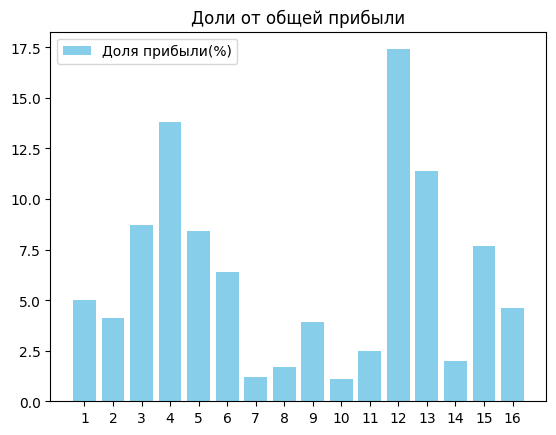

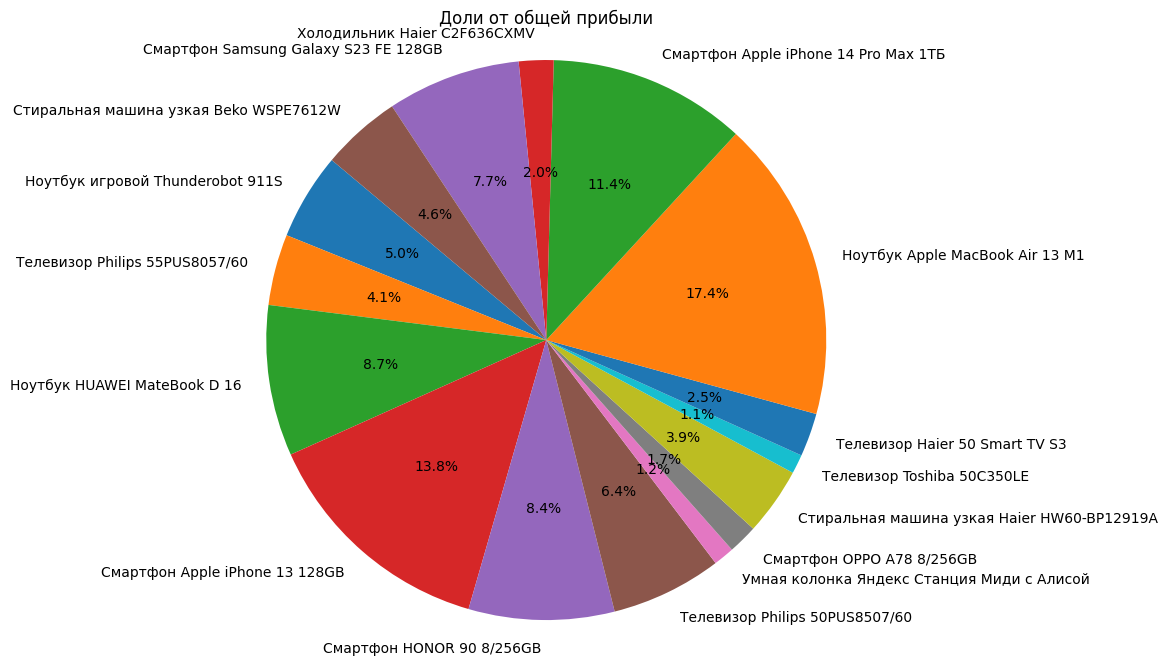

In [15]:
file_name = 'orders.csv'
visualisator.show_report(file_name)
visualisator.show_histogram(file_name)
visualisator.show_cercle_diagram(file_name)

### Вывод всех товаров в словарном порядке

In [23]:
csv_data = read_data('orders.csv')
array = quick_sort(csv_data, 2)

titles = (['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'])
array.insert(0, titles)

file = 'sorted_oraders'
create_csv_file(data=array, file_name=file)
show_csv_table(file=file)

CSV файл sorted_oraders успешно создан.


,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,12,2024-05-16,Ноутбук Apple MacBook Air 13 M1,Ноутбуки,21,90999,1910979
,3,2024-05-16,Ноутбук HUAWEI MateBook D 16,Ноутбуки,19,49999,949981
,1,2024-05-15,Ноутбук игровой Thunderobot 911S,Ноутбуки,7,77999,545993
,4,2024-05-16,Смартфон Apple iPhone 13 128GB,Смартфоны,23,65999,1517977
,13,2024-05-16,Смартфон Apple iPhone 14 Pro Max 1ТБ,Смартфоны,6,209190,1255140
,5,2024-05-16,Смартфон HONOR 90 8/256GB,Смартфоны,23,39999,919977
,8,2024-05-16,Смартфон OPPO A78 8/256GB,Смартфоны,7,16999,188993
,15,2024-05-16,Смартфон Samsung Galaxy S23 FE 128GB,Смартфоны,14,59999,839986
,16,2024-05-16,Стиральная машина узкая Beko WSPE7612W,Стиральные машины,20,24999,499980
,9,2024-05-16,Стиральная машина узкая Haier HW60-BP12919A,Стиральные машины,13,32999,428987


### Поиск товара по имени

In [27]:
csv_data = read_data('sorted_oraders')
target = input()
target_index = binary_search(array, target, 2) - 1

output_array = [
   ['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'],
   csv_data[target_index]
]

file = 'searched_product'
create_csv_file(output_array, file_name=file)
show_csv_table(file=file)

CSV файл searched_product успешно создан.


,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,7,2024-05-16,Умная колонка Яндекс Станция Миди с Алисой,Портативная акустика,8,16999,135992
